<a href="https://colab.research.google.com/github/ilikemichael/ml1216/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/ml1216/raw/main/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/ml1216/raw/main/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7f321bcac550>)

In [2]:
import pandas as pd
train = pd.read_csv("train.csv", encoding="utf-8")
test = pd.read_csv("test.csv", encoding="utf-8")

In [3]:
#pd.concat([train,test])
datas = pd.concat([train,test], axis=0, ignore_index=True)
datas =datas.drop(["PassengerId", "Survived"], axis=1)
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
s = datas.isna().sum()
#篩選方式:series[跟資料筆數一樣多的True/False]
s[s>0].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [5]:
count = datas["Ticket"].value_counts() 
def share(tn):
    return count[tn]
datas["Ticket"] = datas["Ticket"].apply(share)

In [6]:
med = datas.median().drop("Pclass")
med

Age       28.0000
SibSp      0.0000
Parch      0.0000
Ticket     1.0000
Fare      14.4542
dtype: float64

In [7]:
datas = datas.fillna(med)
# verify = datas.isna().sum(0)
# verify

In [8]:
#idxmax找到最大值的index
most = datas["Embarked"].value_counts().idxmax()
datas["Embarked"]=datas["Embarked"].fillna(most)
#datas["Embarked"].isna().sum()#確認都已經填滿了

In [9]:
def cabin(c):
    if pd.isna(c):
        return None
    else:
        return c[0]
datas["Cabin"] = datas["Cabin"].apply(cabin)

In [10]:
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1,7.2500,None,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,2,71.2833,C,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,1,7.9250,None,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,2,53.1000,C,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,1,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,28.0,0,0,1,8.0500,None,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,3,108.9000,C,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,1,7.2500,None,S
1307,3,"Ware, Mr. Frederick",male,28.0,0,0,1,8.0500,None,S


In [11]:
def name(n):
    n = n.split(",")[-1].split(".")[0]
    return n.strip()
count = datas["Name"].apply(name).value_counts()
# ['Mr', 'Miss', 'Mrs', 'Master']
reserved = count[:4].index
def name(n):
    n = n.split(",")[-1].split(".")[0]
    n = n.strip()
    if n in reserved:
        return n
    else:
        return None
datas["Name"] = datas["Name"].apply(name)
datas
#print(datas["Cabin"].value_counts())

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,None,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,None,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,28.0,0,0,1,8.0500,None,S
1305,1,None,female,39.0,0,0,3,108.9000,C,C
1306,3,Mr,male,38.5,0,0,1,7.2500,None,S
1307,3,Mr,male,28.0,0,0,1,8.0500,None,S


In [12]:
#one hot encoding
datas = pd.get_dummies(datas)
datas = pd.get_dummies(datas, columns=["Pclass"])
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [13]:
datas["Family"] = datas["SibSp"] + datas["Parch"]
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


這裡要使用隨機森林 Ensemble RandomForestClassifier ,其實 max_depth不要太深, 
n_estimateors 100~200都可以, n_jobs=-1(選擇最大核心數)平行化概念,可以同時多工

In [14]:

# iloc: [1st, 2nd, ....]
x_train = datas.iloc[:len(train)]
y_train = train["Survived"]
x_test = datas.iloc[len(train):]
x_test

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
891,34.5,0,0,1,7.8292,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
892,47.0,1,0,1,7.0000,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
893,62.0,0,0,1,9.6875,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
894,27.0,0,0,1,8.6625,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
895,22.0,1,1,2,12.2875,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {
   "n_estimators":range(80, 120, 1),
   "max_depth":range(5, 9)
}
clf = RandomForestClassifier()
search = GridSearchCV(clf, params, n_jobs=-1, cv=10)
search.fit(x_train, y_train)
print(search.best_score_)
print(search.best_params_)

0.8439950062421973
{'max_depth': 7, 'n_estimators': 93}


In [16]:
import numpy as np
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=107, max_depth=7)
scores = cross_val_score(clf, x_train, y_train, n_jobs=-1, cv=10)
print(scores)
print(np.average(scores))

[0.81111111 0.87640449 0.74157303 0.8988764  0.85393258 0.84269663
 0.84269663 0.7752809  0.87640449 0.82022472]
0.8339200998751559


In [17]:
#算出結果,存檔
clf = RandomForestClassifier(n_estimators=25, max_depth=7)
clf.fit(x_train, y_train)
pre = clf.predict(x_test)
df = pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived":pre
})
df.to_csv("rf.csv", encoding="utf-8", index=False)

25


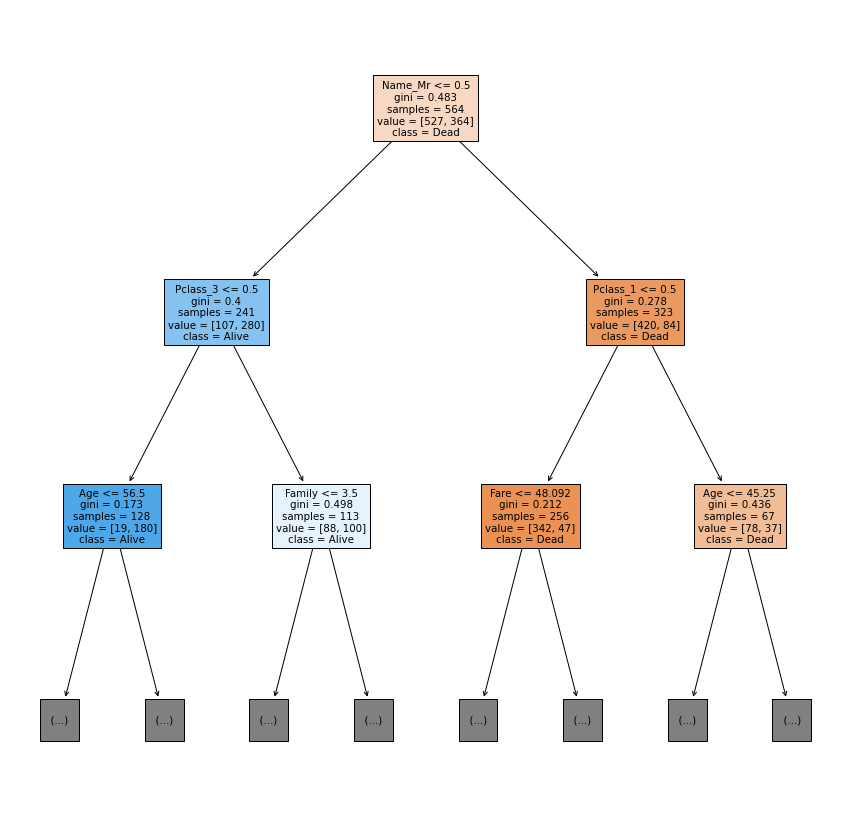

In [18]:
#畫圖驗證

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
print(len(clf.estimators_))
plt.figure(figsize=(15, 15))
tree = plot_tree(clf.estimators_[3], 
         feature_names=datas.columns,
         class_names=["Dead", "Alive"],
         max_depth=2,
         filled=True)
plt.show()

In [19]:
#利用KNN 及 MinMaxScaler(所有東西0~1)來算一下
#訓練資料fit, transform, 測試資料直接transform
#先Scaler,讓所有單位一致,讓每個數值落在0~1之間

from sklearn.preprocessing import MinMaxScaler
# iloc: [1st, 2nd, ....]
scaler = MinMaxScaler()
datas_scale = scaler.fit_transform(datas)
datas_scale = pd.DataFrame(datas_scale, columns=datas.columns)
x_train_scale = datas_scale.iloc[:len(train)]
x_test_scale = datas_scale.iloc[len(train):]
x_test_scale

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
891,0.430039,0.000,0.000000,0.0,0.015282,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
892,0.586622,0.125,0.000000,0.0,0.013663,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.1
893,0.774521,0.000,0.000000,0.0,0.018909,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
894,0.336089,0.000,0.000000,0.0,0.016908,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
895,0.273456,0.125,0.111111,0.1,0.023984,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1305,0.486409,0.000,0.000000,0.2,0.212559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1306,0.480145,0.000,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1307,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [20]:
from sklearn.neighbors import KNeighborsClassifier
params = {
   "n_neighbors":range(5, 100)
}
clf = KNeighborsClassifier()
search = GridSearchCV(clf, params, n_jobs=-1, cv=10)
search.fit(x_train_scale, y_train)
print(search.best_score_)
print(search.best_params_)

0.832796504369538
{'n_neighbors': 7}


In [21]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_train_scale, y_train)
pre = clf.predict(x_test_scale)
df = pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived":pre
})
df.to_csv("knn.csv", encoding="utf-8", index=False)